In [1]:
using Pkg; Pkg.activate(".");
using Revise
using Statistics
import MUST
using PyPlot

MUST.@get_help_py stagger
MUST.@get_help visual 
MUST.@import_dispatch "../../../dispatch2_clean/dispatch2";

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost/Project.toml`
┌ Info: Precompiling MUST [78ff202f-d08f-4a78-aa4d-c8e96fa3dcb9]
└ @ Base loading.jl:1342


In [2]:
folder = "stagger_sun/"
model  = "t5777g44m0005";
snap_j = MUST.StaggerSnap(model, folder);

┌ Warning: bx not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: by not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: bz not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332


In [3]:
# The gas pressure is not saved in dispatch, so we use the same EOS for both to get it
eos_path = "input_data/solar_lte"
sqEOS = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

In [4]:
b = MUST.Box(snap_j, eos=sqEOS);

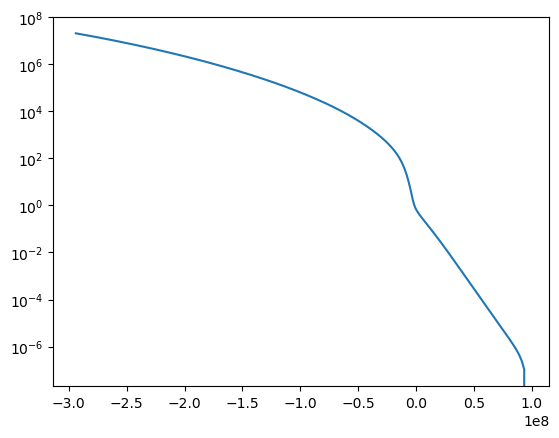

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2b1ea88fe400>

In [5]:
z = MUST.axis(b, :z)
d = MUST.plane_statistic(mean, b, :τ_ross)
plt.semilogy(z, d)

In [6]:
MUST.save(b; name="box_solar_stagger", folder="")

"box_solar_stagger.hdf5"